<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/333_Intro_to_YOLO_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import torch
import yaml
import os

import locale
locale.getpreferredencoding = lambda: "UTF-8"

<br> This section is for model training on COCO dataset. After image download and annotation using simple-image-download and labelImg as shown in the 'download-custom-img' folder, the images are added to '/train' and '/val' folders in this directory along with the original COCO dataset.
<br>
<br> The 'coco-custom.yaml' - the model configuration was also edited to define the dataset directory for YOLO.
<br>
<br> This section returns:
<br> - the model evaluation stored in '/results/100_epochs'
<br> - the final models in '/results/100_epoch/weights' as .pt files
<br> - prediction on val images in '/results/100_epoch/val_batch...jpg
<br> - prediction on unseen images in '/predictions.png'


## YOLO v8 on VisDrone Dataset

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
t = torch.tensor([1,2], device=device)
t

tensor([1, 2], device='cuda:0')

In [7]:
#Detection model
model = YOLO('yolov8n.pt')

import locale
locale.getpreferredencoding = lambda: "UTF-8"

project = "result"
name = "10_epochs_1"
results = model.train(data='VisDrone.yaml',
                      project=project,
                      name=name,
                      patience=50,
                      batch=4,
                      epochs=100,
                      imgsz=640)

New https://pypi.org/project/ultralytics/8.1.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.239 🚀 Python-3.9.18 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=VisDrone.yaml, epochs=100, time=None, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=result, name=10_epochs_12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

train: Scanning D:\Drone-Kalman-Filters\drone-kalman-filters\2-obj-detection-model\datasets-custom\VisDrone\VisDrone2019-DET-train\labels.cache... 6534 images, 3 backgrounds, 0 corrupt: 100%|██████████| 6537/6537 [00:00<?, ?it/s]

train: WARNING ⚠️ D:\Drone-Kalman-Filters\drone-kalman-filters\2-obj-detection-model\datasets-custom\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ D:\Drone-Kalman-Filters\drone-kalman-filters\2-obj-detection-model\datasets-custom\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ D:\Drone-Kalman-Filters\drone-kalman-filters\2-obj-detection-model\datasets-custom\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning D:\Drone-Kalman-Filters\drone-kalman-filters\2-obj-detection-model\datasets-custom\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to result\10_epochs_12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.59G      1.843       1.95      1.066         21        640: 100%|██████████| 1635/1635 [05:20<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:12<00:00,  5.32it/s]


                   all        548      29320      0.576      0.189      0.206      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.78G      1.749      1.408      1.007        134        640: 100%|██████████| 1635/1635 [04:58<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:11<00:00,  5.95it/s]


                   all        548      29320      0.552      0.232      0.227      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.99G      1.778      1.375      1.005        193        640: 100%|██████████| 1635/1635 [04:48<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:11<00:00,  5.77it/s]


                   all        548      29320      0.308       0.25      0.239      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.33G      1.757      1.332     0.9986         22        640: 100%|██████████| 1635/1635 [04:59<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:09<00:00,  7.02it/s]

                   all        548      29320      0.319      0.257      0.247      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.46G      1.722      1.269     0.9907          1        640: 100%|██████████| 1635/1635 [02:19<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 15.93it/s]

                   all        548      29320      0.343      0.265      0.263      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.28G      1.684      1.211     0.9816         28        640: 100%|██████████| 1635/1635 [02:00<00:00, 13.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 17.15it/s]

                   all        548      29320      0.334      0.277      0.271      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.57G      1.659      1.182     0.9748        117        640: 100%|██████████| 1635/1635 [01:54<00:00, 14.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.38it/s]

                   all        548      29320      0.366      0.277      0.276      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.93G       1.63      1.141     0.9699        173        640: 100%|██████████| 1635/1635 [01:47<00:00, 15.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 15.77it/s]

                   all        548      29320      0.358       0.29      0.284       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       1.5G      1.616      1.124     0.9639         42        640: 100%|██████████| 1635/1635 [02:05<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.82it/s]

                   all        548      29320      0.369      0.293      0.291      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.26G      1.604      1.105     0.9598         32        640: 100%|██████████| 1635/1635 [01:51<00:00, 14.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 11.54it/s]


                   all        548      29320      0.357      0.281       0.29      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.82G      1.593      1.097     0.9571         42        640: 100%|██████████| 1635/1635 [02:41<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:06<00:00, 11.28it/s]


                   all        548      29320      0.409      0.296        0.3      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.07G      1.582      1.081     0.9527          5        640: 100%|██████████| 1635/1635 [02:41<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:06<00:00, 11.50it/s]

                   all        548      29320      0.385      0.296      0.297      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.33G      1.569      1.068      0.953         52        640: 100%|██████████| 1635/1635 [02:38<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:06<00:00, 11.16it/s]

                   all        548      29320      0.424       0.29      0.304       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.14G      1.554      1.058     0.9487          9        640: 100%|██████████| 1635/1635 [02:45<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:06<00:00, 10.96it/s]

                   all        548      29320      0.398      0.305      0.303      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       1.8G      1.551      1.045     0.9461        102        640: 100%|██████████| 1635/1635 [04:44<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:11<00:00,  5.93it/s]


                   all        548      29320      0.453      0.303       0.31      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.83G      1.543      1.038      0.945         32        640: 100%|██████████| 1635/1635 [04:08<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 11.58it/s]


                   all        548      29320      0.418      0.306      0.312      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       1.9G      1.537      1.032     0.9426         14        640: 100%|██████████| 1635/1635 [02:57<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 11.84it/s]

                   all        548      29320      0.404      0.313      0.311      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.91G      1.528      1.023     0.9424         37        640: 100%|██████████| 1635/1635 [02:52<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 11.63it/s]

                   all        548      29320      0.404      0.311      0.317      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.05G      1.524      1.018     0.9383         62        640: 100%|██████████| 1635/1635 [02:54<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 11.80it/s]

                   all        548      29320       0.42      0.306      0.315      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.03G      1.519      1.013     0.9384        111        640: 100%|██████████| 1635/1635 [03:01<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 11.92it/s]

                   all        548      29320       0.44      0.316      0.322      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.2G      1.517      1.007     0.9358         76        640: 100%|██████████| 1635/1635 [02:43<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 11.81it/s]


                   all        548      29320       0.41      0.321      0.321      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.76G      1.518      1.005     0.9378         21        640: 100%|██████████| 1635/1635 [02:43<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 12.46it/s]


                   all        548      29320      0.408      0.315      0.321      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.73G      1.503     0.9908     0.9345         39        640: 100%|██████████| 1635/1635 [02:43<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 12.57it/s]


                   all        548      29320      0.409      0.327      0.325      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.02G      1.499     0.9874     0.9314         21        640: 100%|██████████| 1635/1635 [04:19<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:11<00:00,  6.14it/s]


                   all        548      29320      0.425      0.324      0.327      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.36G      1.492      0.985      0.933         36        640: 100%|██████████| 1635/1635 [04:54<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:11<00:00,  5.95it/s]


                   all        548      29320      0.428      0.332      0.332      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.31G      1.491     0.9791     0.9311         97        640: 100%|██████████| 1635/1635 [05:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:12<00:00,  5.51it/s]


                   all        548      29320      0.432      0.325      0.328      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.84G      1.486     0.9794     0.9306         61        640: 100%|██████████| 1635/1635 [04:27<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:11<00:00,  5.87it/s]


                   all        548      29320      0.409      0.331      0.329      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.94G       1.49     0.9771     0.9296         31        640: 100%|██████████| 1635/1635 [02:59<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.83it/s]

                   all        548      29320      0.505      0.306      0.331      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.04G       1.48     0.9709     0.9272         62        640: 100%|██████████| 1635/1635 [01:50<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.60it/s]


                   all        548      29320      0.437      0.317      0.329      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.56G      1.485     0.9756     0.9286          8        640: 100%|██████████| 1635/1635 [01:51<00:00, 14.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.33it/s]

                   all        548      29320      0.425      0.333      0.335      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.82G      1.473     0.9656     0.9251         30        640: 100%|██████████| 1635/1635 [02:03<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.49it/s]

                   all        548      29320      0.432      0.334      0.336      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.05G      1.456     0.9478     0.9239         85        640: 100%|██████████| 1635/1635 [01:47<00:00, 15.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.59it/s]

                   all        548      29320      0.431      0.333      0.338      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.52G      1.462     0.9544      0.926         74        640: 100%|██████████| 1635/1635 [01:46<00:00, 15.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.84it/s]

                   all        548      29320      0.417      0.333      0.337       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.89G       1.46     0.9575     0.9251         74        640: 100%|██████████| 1635/1635 [02:30<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.38it/s]

                   all        548      29320      0.424      0.336      0.337      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.78G      1.453     0.9459     0.9215         22        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 17.11it/s]

                   all        548      29320      0.426      0.337      0.341      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       1.9G      1.444     0.9407     0.9218         16        640: 100%|██████████| 1635/1635 [02:03<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.94it/s]

                   all        548      29320      0.431      0.338      0.343      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.22G      1.451     0.9437     0.9218         14        640: 100%|██████████| 1635/1635 [01:50<00:00, 14.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.03it/s]


                   all        548      29320      0.449      0.337       0.34      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.76G      1.448     0.9394     0.9199         19        640: 100%|██████████| 1635/1635 [02:31<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.54it/s]

                   all        548      29320      0.445      0.338      0.344      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.78G       1.45     0.9379     0.9199        110        640: 100%|██████████| 1635/1635 [01:50<00:00, 14.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.75it/s]

                   all        548      29320      0.448      0.336      0.343      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.88G      1.443     0.9323     0.9184         22        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.43it/s]

                   all        548      29320       0.44      0.341      0.345      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.39G      1.442     0.9341     0.9178         41        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.90it/s]

                   all        548      29320      0.436      0.341      0.344      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.73G      1.436     0.9257     0.9165         25        640: 100%|██████████| 1635/1635 [01:50<00:00, 14.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 15.61it/s]


                   all        548      29320      0.444      0.341      0.346      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.87G      1.428     0.9238     0.9172         51        640: 100%|██████████| 1635/1635 [01:53<00:00, 14.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.89it/s]

                   all        548      29320      0.455      0.343      0.349      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.03G      1.426     0.9192     0.9153         50        640: 100%|██████████| 1635/1635 [01:47<00:00, 15.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.91it/s]


                   all        548      29320      0.444      0.343      0.349      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.09G      1.422     0.9218     0.9165         61        640: 100%|██████████| 1635/1635 [01:51<00:00, 14.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.28it/s]


                   all        548      29320       0.44      0.342      0.348      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.22G      1.429     0.9194     0.9154         55        640: 100%|██████████| 1635/1635 [01:54<00:00, 14.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.02it/s]


                   all        548      29320      0.437      0.339      0.346      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.31G      1.422     0.9172     0.9149         23        640: 100%|██████████| 1635/1635 [01:51<00:00, 14.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.31it/s]

                   all        548      29320      0.448       0.34      0.349      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.16G      1.421      0.916     0.9143         70        640: 100%|██████████| 1635/1635 [01:47<00:00, 15.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.66it/s]


                   all        548      29320      0.447      0.348      0.353       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.75G      1.423     0.9121     0.9137         59        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.21it/s]


                   all        548      29320      0.442      0.346      0.352       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.82G      1.413     0.9062     0.9125         26        640: 100%|██████████| 1635/1635 [01:52<00:00, 14.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.76it/s]


                   all        548      29320      0.454      0.345      0.355      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.52G      1.416     0.9074     0.9137         13        640: 100%|██████████| 1635/1635 [01:48<00:00, 15.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.26it/s]


                   all        548      29320      0.456      0.343      0.354      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.91G      1.411     0.9066     0.9133         74        640: 100%|██████████| 1635/1635 [01:51<00:00, 14.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.23it/s]

                   all        548      29320      0.462      0.343      0.353      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.68G      1.409     0.9025     0.9113         33        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.36it/s]

                   all        548      29320      0.447      0.354      0.356      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.34G      1.418     0.9077     0.9122         73        640: 100%|██████████| 1635/1635 [01:50<00:00, 14.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 14.97it/s]

                   all        548      29320      0.446      0.346      0.356      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.22G      1.404     0.9024     0.9108         40        640: 100%|██████████| 1635/1635 [01:50<00:00, 14.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 15.97it/s]

                   all        548      29320      0.457      0.348      0.358      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.33G      1.394      0.888     0.9086         16        640: 100%|██████████| 1635/1635 [03:08<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.79it/s]

                   all        548      29320       0.46      0.345      0.358      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.34G      1.398     0.8911      0.908         58        640: 100%|██████████| 1635/1635 [01:46<00:00, 15.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.76it/s]

                   all        548      29320       0.46      0.345      0.358      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.88G      1.393     0.8857     0.9075         47        640: 100%|██████████| 1635/1635 [01:48<00:00, 15.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 17.18it/s]

                   all        548      29320      0.461      0.346      0.358      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.02G      1.391     0.8873     0.9077         51        640: 100%|██████████| 1635/1635 [01:51<00:00, 14.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 17.21it/s]


                   all        548      29320      0.456      0.353       0.36      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.79G      1.392     0.8915     0.9072          2        640: 100%|██████████| 1635/1635 [01:50<00:00, 14.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.64it/s]


                   all        548      29320      0.455      0.347      0.361      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.74G      1.396     0.8898     0.9066         65        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.77it/s]

                   all        548      29320      0.455      0.348      0.361      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.08G      1.389     0.8841     0.9055         21        640: 100%|██████████| 1635/1635 [01:48<00:00, 15.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.55it/s]


                   all        548      29320      0.444      0.355      0.363      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.77G      1.389      0.885     0.9069         29        640: 100%|██████████| 1635/1635 [01:48<00:00, 15.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.26it/s]


                   all        548      29320      0.445      0.355      0.361      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       1.9G      1.397     0.8853     0.9081         16        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.72it/s]

                   all        548      29320      0.464      0.351      0.362      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.96G      1.383     0.8804     0.9059         33        640: 100%|██████████| 1635/1635 [01:51<00:00, 14.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.95it/s]


                   all        548      29320      0.463      0.348      0.361      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.14G      1.384     0.8761     0.9056         44        640: 100%|██████████| 1635/1635 [01:54<00:00, 14.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.80it/s]

                   all        548      29320      0.452      0.351      0.363      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       1.8G      1.385     0.8767     0.9031         90        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.53it/s]

                   all        548      29320      0.459       0.35      0.363      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.39G      1.373      0.873     0.9051         89        640: 100%|██████████| 1635/1635 [01:54<00:00, 14.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.83it/s]


                   all        548      29320      0.467      0.351      0.364      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.63G      1.382      0.873     0.9043         24        640: 100%|██████████| 1635/1635 [02:07<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.46it/s]


                   all        548      29320      0.451      0.356      0.365      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.42G      1.377     0.8683     0.9028        144        640: 100%|██████████| 1635/1635 [02:09<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:08<00:00,  7.73it/s]


                   all        548      29320      0.464      0.354      0.365      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.82G      1.372     0.8677     0.9033         87        640: 100%|██████████| 1635/1635 [03:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:09<00:00,  7.33it/s]


                   all        548      29320      0.462      0.357      0.366      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.04G      1.372     0.8631      0.903         30        640: 100%|██████████| 1635/1635 [03:04<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.66it/s]


                   all        548      29320      0.448      0.356      0.364      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         2G      1.373      0.867     0.9029          4        640: 100%|██████████| 1635/1635 [01:47<00:00, 15.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.86it/s]


                   all        548      29320      0.457      0.359      0.366      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.91G      1.379     0.8695     0.9034         21        640: 100%|██████████| 1635/1635 [01:58<00:00, 13.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.76it/s]

                   all        548      29320      0.454      0.359      0.367      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.83G      1.369       0.86     0.9023         57        640: 100%|██████████| 1635/1635 [02:29<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.59it/s]

                   all        548      29320      0.459      0.355      0.366      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.27G      1.356      0.851     0.8995         79        640: 100%|██████████| 1635/1635 [01:53<00:00, 14.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.50it/s]

                   all        548      29320      0.455      0.359      0.367      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.51G      1.363     0.8565     0.9027        104        640: 100%|██████████| 1635/1635 [01:56<00:00, 14.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.70it/s]

                   all        548      29320      0.463      0.355      0.366      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.19G      1.366     0.8579     0.8996        198        640: 100%|██████████| 1635/1635 [01:46<00:00, 15.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.59it/s]

                   all        548      29320      0.457      0.361      0.367      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.89G      1.356      0.848     0.8991         87        640: 100%|██████████| 1635/1635 [02:58<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:12<00:00,  5.66it/s]


                   all        548      29320      0.456       0.36      0.368        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.09G      1.361     0.8503     0.8985         59        640: 100%|██████████| 1635/1635 [03:20<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:05<00:00, 12.53it/s]

                   all        548      29320      0.471      0.358      0.368        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.67G      1.357     0.8494     0.9001         55        640: 100%|██████████| 1635/1635 [03:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.29it/s]


                   all        548      29320       0.47      0.355      0.368        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.25G      1.352     0.8449     0.8994         38        640: 100%|██████████| 1635/1635 [02:28<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:10<00:00,  6.48it/s]


                   all        548      29320      0.467      0.357      0.369        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.06G      1.359      0.849     0.8968        105        640: 100%|██████████| 1635/1635 [04:37<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:10<00:00,  6.76it/s]


                   all        548      29320      0.471      0.354      0.369        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.67G      1.353      0.841     0.8962         44        640: 100%|██████████| 1635/1635 [02:43<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 19.01it/s]

                   all        548      29320      0.464      0.358      0.369        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.78G      1.352     0.8446     0.8973         68        640: 100%|██████████| 1635/1635 [02:01<00:00, 13.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.24it/s]

                   all        548      29320      0.467      0.358      0.369        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.76G      1.348     0.8404     0.8965         22        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.36it/s]

                   all        548      29320      0.457      0.365       0.37      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.96G      1.348     0.8395     0.8972          8        640: 100%|██████████| 1635/1635 [01:48<00:00, 15.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.32it/s]

                   all        548      29320      0.466      0.359       0.37      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.07G      1.341     0.8391     0.8967         24        640: 100%|██████████| 1635/1635 [01:49<00:00, 14.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:07<00:00,  8.67it/s]


                   all        548      29320      0.462      0.361       0.37      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.33G      1.336     0.8298     0.8964         42        640: 100%|██████████| 1635/1635 [02:59<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.85it/s]


                   all        548      29320      0.462      0.363      0.371      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.47G      1.338     0.8345     0.8953         39        640: 100%|██████████| 1635/1635 [03:22<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.79it/s]

                   all        548      29320       0.46      0.365      0.371      0.202


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       1.7G      1.336     0.8309     0.8951          1        640: 100%|██████████| 1635/1635 [02:06<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.09it/s]

                   all        548      29320      0.458      0.363      0.369      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.68G      1.325     0.8197     0.8916         11        640: 100%|██████████| 1635/1635 [02:03<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.65it/s]


                   all        548      29320      0.464      0.359      0.368      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.94G      1.322     0.8154     0.8919         35        640: 100%|██████████| 1635/1635 [01:55<00:00, 14.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.01it/s]

                   all        548      29320      0.461      0.361      0.368        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.31G      1.318      0.815     0.8916          9        640: 100%|██████████| 1635/1635 [01:45<00:00, 15.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 16.29it/s]


                   all        548      29320      0.464       0.36      0.369        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.85G       1.32      0.812     0.8904         76        640: 100%|██████████| 1635/1635 [01:51<00:00, 14.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.88it/s]

                   all        548      29320       0.46      0.362      0.369        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.28G      1.316     0.8103     0.8891         19        640: 100%|██████████| 1635/1635 [01:52<00:00, 14.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.58it/s]

                   all        548      29320      0.459      0.361      0.369        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.95G      1.313     0.8067     0.8894         35        640: 100%|██████████| 1635/1635 [01:44<00:00, 15.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:04<00:00, 17.13it/s]

                   all        548      29320       0.46      0.361       0.37      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.68G      1.308     0.8058     0.8885         13        640: 100%|██████████| 1635/1635 [02:34<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.32it/s]

                   all        548      29320       0.46      0.361       0.37      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.75G      1.307     0.8005     0.8875         39        640: 100%|██████████| 1635/1635 [01:45<00:00, 15.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 17.57it/s]

                   all        548      29320      0.463       0.36       0.37      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.77G      1.309     0.8037     0.8877         24        640: 100%|██████████| 1635/1635 [01:46<00:00, 15.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:03<00:00, 18.27it/s]


                   all        548      29320      0.467       0.36       0.37      0.201

100 epochs completed in 4.273 hours.
Optimizer stripped from result\10_epochs_12\weights\last.pt, 6.2MB
Optimizer stripped from result\10_epochs_12\weights\best.pt, 6.2MB

Validating result\10_epochs_12\weights\best.pt...
Ultralytics YOLOv8.0.239 🚀 Python-3.9.18 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:08<00:00,  8.12it/s]


                   all        548      29320      0.456      0.366      0.372      0.201
            pedestrian        548       8844      0.459      0.354       0.36      0.155
                people        548       5125      0.497      0.293      0.318       0.12
               bicycle        548       1287       0.22     0.0707     0.0564     0.0184
                   car        548      14064      0.649      0.745      0.753      0.513
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to result\10_epochs_12


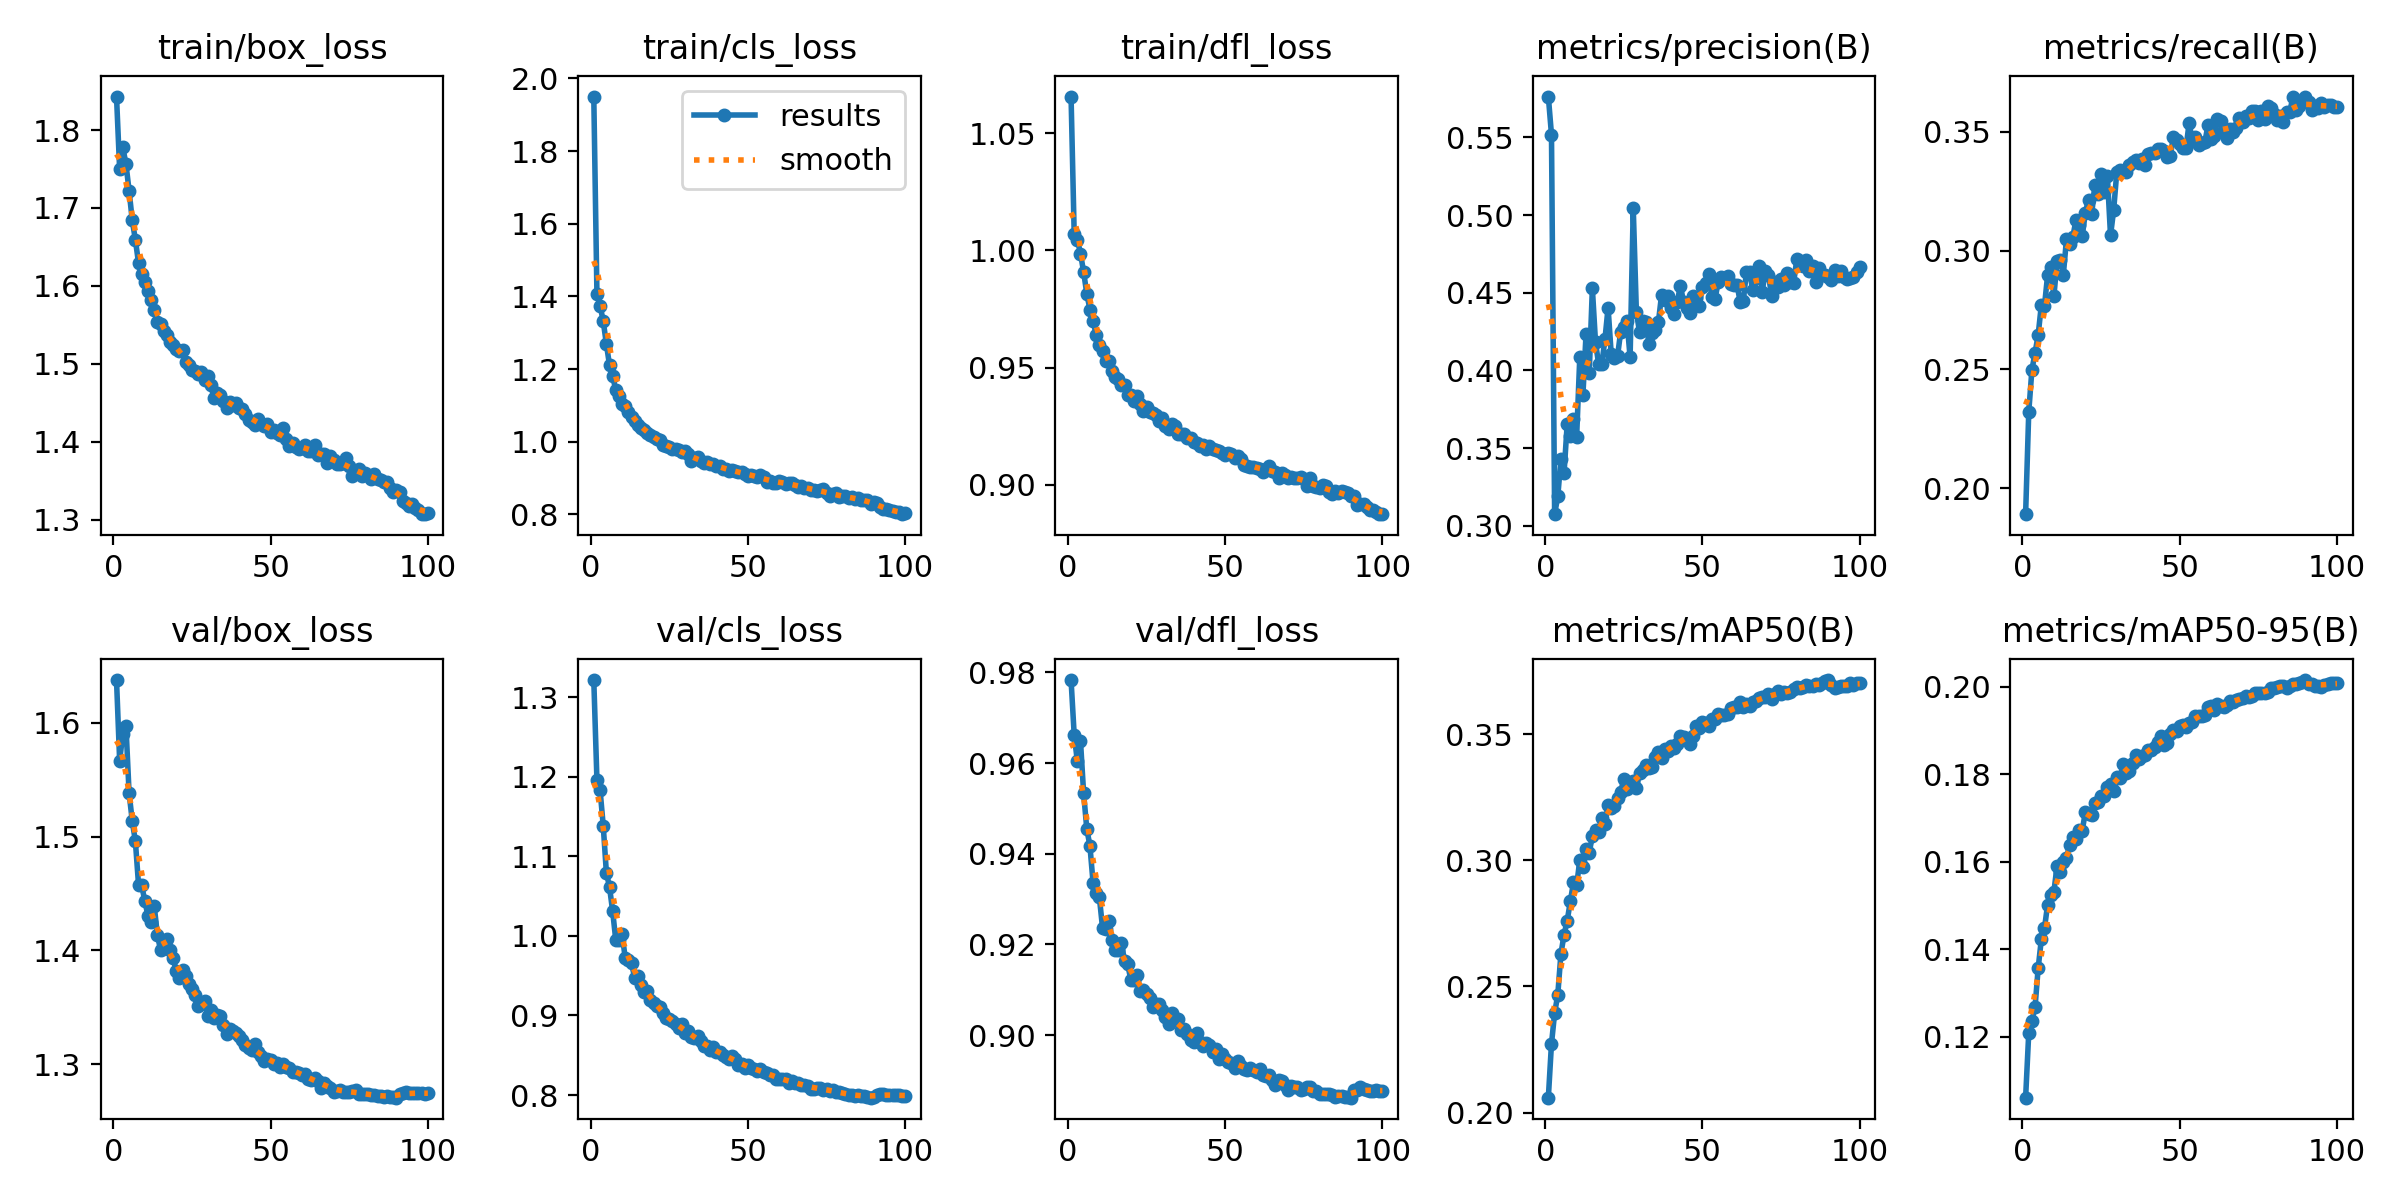

In [2]:
from IPython.display import Image
Image('result/100_epochs_3/results.png')

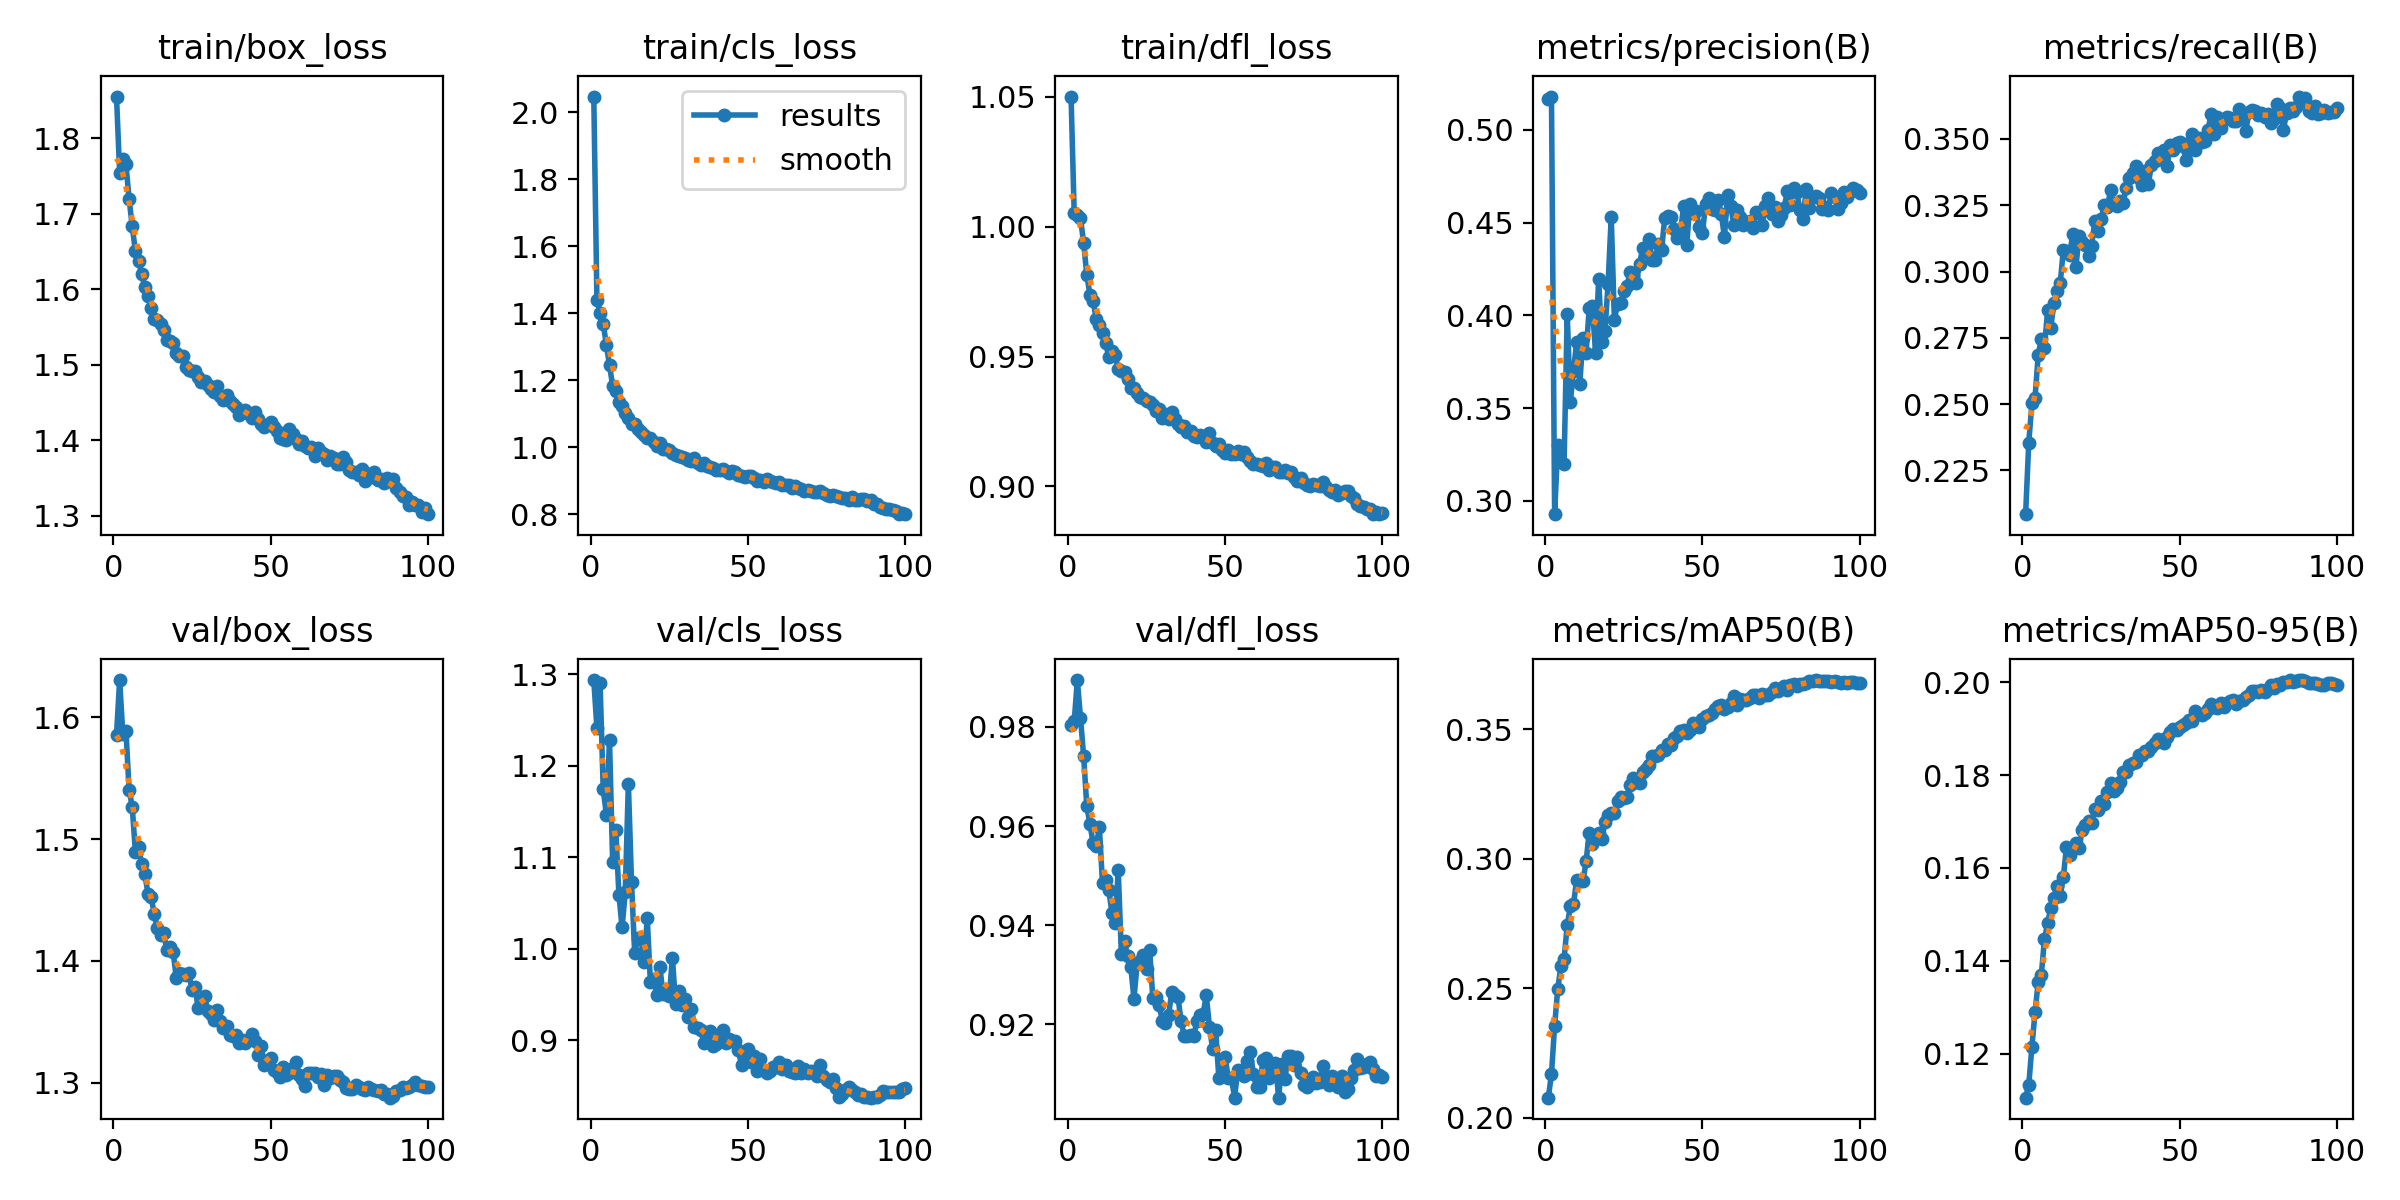

In [3]:
Image('result/100_epochs_2/results.png')

In [ ]:
# ver 2 - trained on 4 classes 100 epochs
# ver 3 - trained on 4 classes 100 epochs

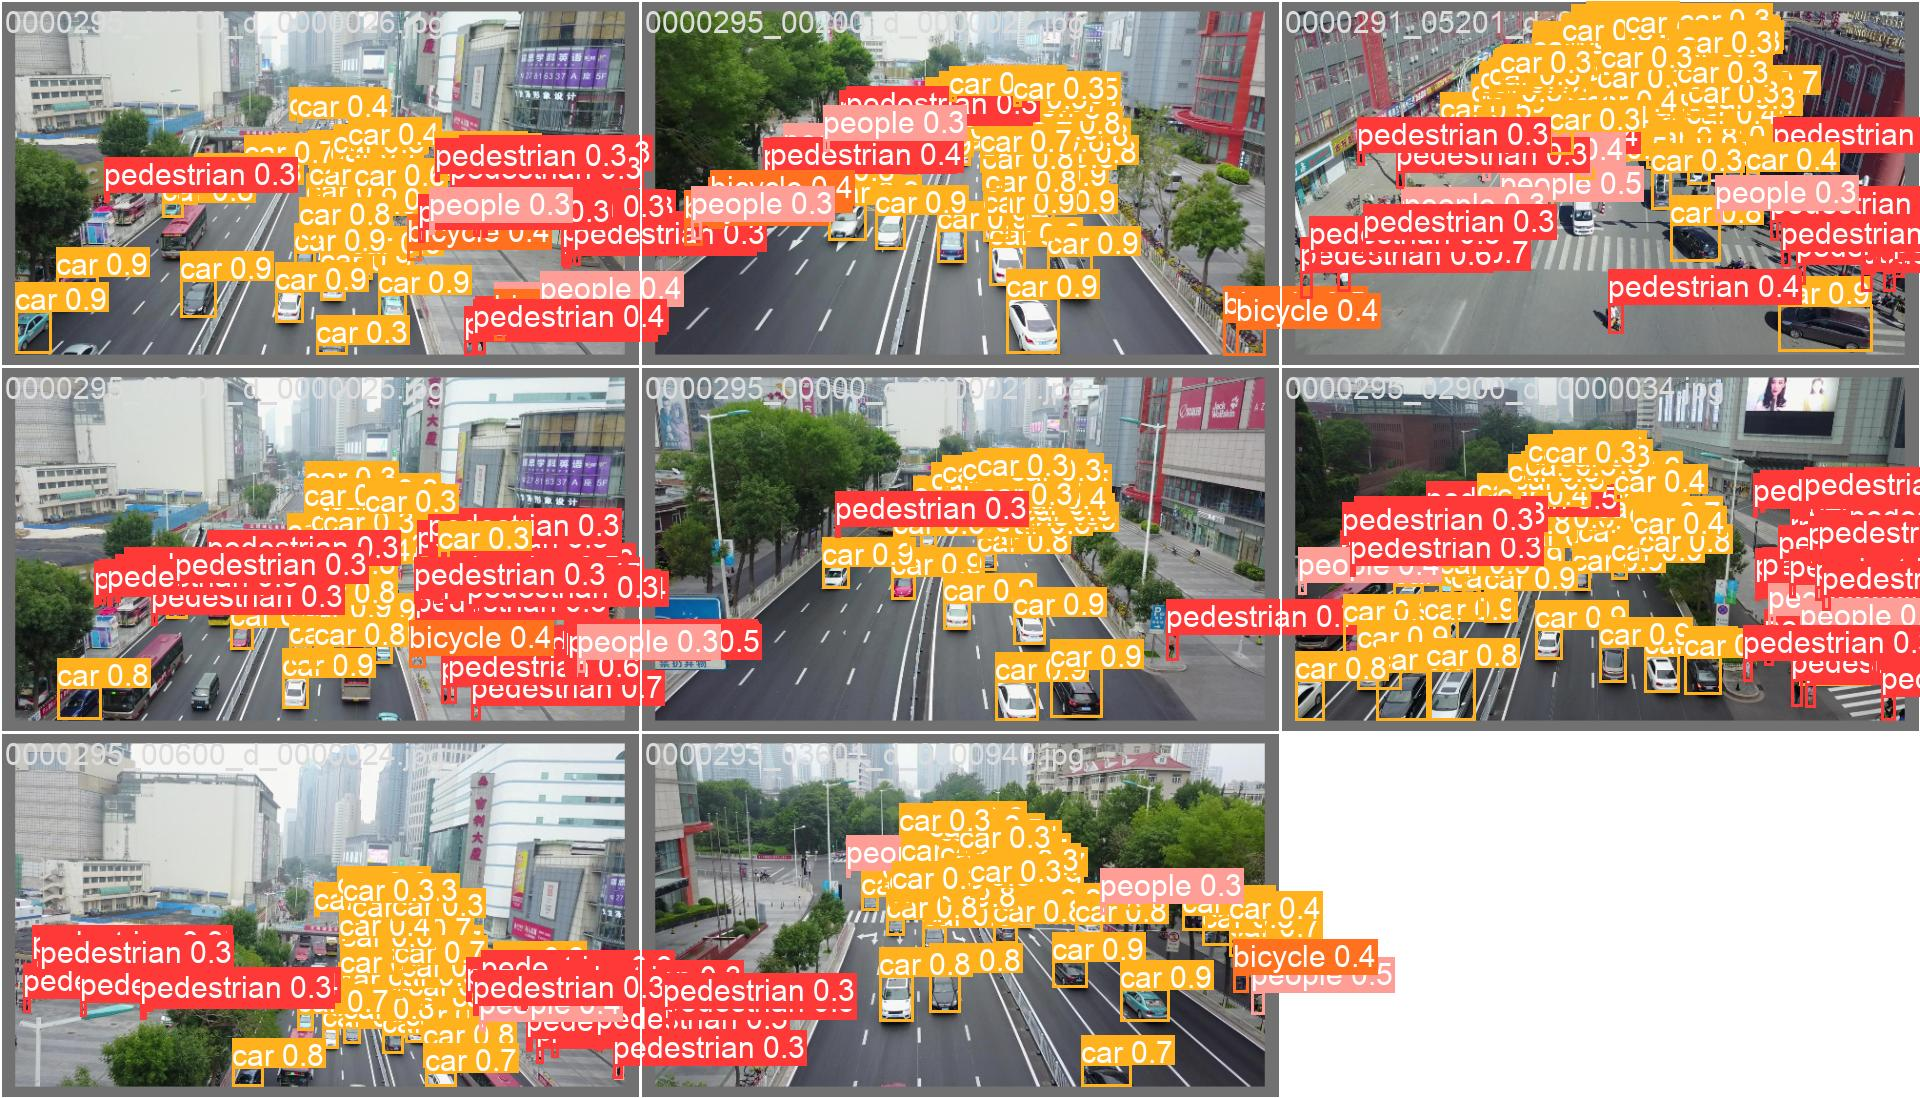

In [4]:
Image('result/100_epochs_3/val_batch1_pred.jpg')

# Predict 

In [12]:
# Define the paths
# model_path = 'result/100_epochs_2/weights/best.pt'
model_path = 'result/100_epochs_3/weights/best.pt'
# folder_dir = 'DSFRAMES\FRAMES-3-cyclist-and-vehicle-tracking-1'
# output_folder = 'prediction-output-3-1' 
folder_dir = 'DSFRAMES\FRAMES-2-cyclist-and-vehicle-tracking-2'
output_folder = 'prediction-output-2-1' 
# folder_dir = 'DSFRAMES\FRAMES-1-drone-tracking-video'
# output_folder = 'prediction-output-1-3' 
os.makedirs(output_folder, exist_ok=True)  

# Load the YOLO model
new_model = YOLO(model_path)

# Get image files from the folder
image_files = [file for file in os.listdir(folder_dir) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Process each image file
for image_file in image_files:
    # Predict on the current image file
    image_path = os.path.join(folder_dir, image_file)
    pred_imgs = new_model.predict(image_path, conf=0.3)

    # Save the predicted image
    result_array = pred_imgs[0].plot()
    output_path = os.path.join(output_folder, image_file)
    plt.imsave(output_path, result_array)

    print(f"Saved: {output_path}")

    # Close the plot to avoid displaying it
    plt.close()

print("All images saved successfully.")



image 1/1 D:\Drone-Kalman-Filters\drone-kalman-filters\DSFRAMES\FRAMES-2-cyclist-and-vehicle-tracking-2\002_0.jpg: 352x640 (no detections), 7.3ms
Speed: 3.5ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
Saved: prediction-output-2-1\002_0.jpg

image 1/1 D:\Drone-Kalman-Filters\drone-kalman-filters\DSFRAMES\FRAMES-2-cyclist-and-vehicle-tracking-2\002_116.jpg: 352x640 (no detections), 6.7ms
Speed: 1.6ms preprocess, 6.7ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
Saved: prediction-output-2-1\002_116.jpg

image 1/1 D:\Drone-Kalman-Filters\drone-kalman-filters\DSFRAMES\FRAMES-2-cyclist-and-vehicle-tracking-2\002_145.jpg: 352x640 (no detections), 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 352, 640)
Saved: prediction-output-2-1\002_145.jpg

image 1/1 D:\Drone-Kalman-Filters\drone-kalman-filters\DSFRAMES\FRAMES-2-cyclist-and-vehicle-tracking-2\002_174.jpg: 352x640 1 pedestrian, 6.7ms
